# preparation
### --import modules
### --connect to databases
### --create MYFLTDATA database

In [1]:
import pymysql as mysql
con= mysql.connect(host='localhost', user='localhost', passwd='root')
cursor = con.cursor()

sql = 'SHOW DATABASES'
cursor.execute(sql)
cursor.fetchall()

sql = 'DROP DATABASE IF EXISTS MYFLTDATA' 
cursor.execute(sql)

sql = 'CREATE DATABASE MYFLTDATA' 
cursor.execute(sql)

sql = 'USE MYFLTDATA' 
cursor.execute(sql)

sql = 'SHOW TABLES' 
cursor.execute(sql)

cursor.fetchall()

()

# the below codes are used to reconnect to database
# change the host user and passwd to your SQL-setting

In [2]:
import pymysql as mysql
con= mysql.connect(host='localhost', user='localhost', passwd='root')
cursor = con.cursor()
cursor.execute('use MYFLTDATA')

0

# TEST

In [3]:
sql = ' DROP TABLE IF EXISTS test;'
cursor.execute(sql)

sql = '''
        CREATE TABLE test ( facId CHAR(6),
        name CHAR(20) NOT NULL,
        department CHAR(20) NOT NULL, rank CHAR(10),
        CONSTRAINT Faculty_facId_pk PRIMARY KEY (facId)
        );
    '''
cursor.execute(sql)

sql = '''
        INSERT INTO test VALUES ("F101", "Adams", "Art", "Professor"); 
        INSERT INTO test VALUES ("F105", "Tanaka", "CSC", "Instructor"); 
        INSERT INTO test VALUES ("F110", "Byrne", "Math", "Assistant"); 
        INSERT INTO test VALUES ("F115", "Smith", "History", "Associate"); 
        INSERT INTO test VALUES ("F221", "Smith", "CSC", "Professor");
    '''
cursor.execute(sql)

E:\Anaconda\lib\site-packages\pymysql\cursors.py:166: Warning: (1051, "Unknown table 'myfltdata.test'")
  result = self._query(query)


1

In [4]:
con.commit()

In [5]:
cursor.execute('SELECT * FROM test')
cursor.fetchall()

(('F101', 'Adams', 'Art', 'Professor'),
 ('F105', 'Tanaka', 'CSC', 'Instructor'),
 ('F110', 'Byrne', 'Math', 'Assistant'),
 ('F115', 'Smith', 'History', 'Associate'),
 ('F221', 'Smith', 'CSC', 'Professor'))

In [6]:
cursor.execute('DROP TABLE IF EXISTS test;')

cursor.execute('SHOW TABLES')

cursor.fetchall()

()

# test completed

# load CSVs

In [7]:
import csv

### create a table

In [8]:
cursor.execute('drop table if exists flights')

E:\Anaconda\lib\site-packages\pymysql\cursors.py:166: Warning: (1051, "Unknown table 'myfltdata.flights'")
  result = self._query(query)


0

In [9]:
sql='''
    CREATE TABLE flights(number VARCHAR(8),
    year CHAR(4),
    month VARCHAR(2),
    day VARCHAR(2),
    dep_time VARCHAR(4),
    sched_dep_time VARCHAR(4),
    dep_delay VARCHAR(10),
    arr_time VARCHAR(4),
    sched_arr_time VARCHAR(4),
    arr_delay VARCHAR(10),
    carrier VARCHAR(10),
    flight VARCHAR(10),
    tailnum VARCHAR(10),
    origin CHAR(3),
    dest CHAR(3),
    air_time VARCHAR(10),
    distance VARCHAR(10),
    hour VARCHAR(4),
    minute VARCHAR(4),
    time_hour VARCHAR(20)
    )
'''
cursor.execute(sql)

0

### load data into the table

In [10]:
# this cell might take minutes
with open('flights.csv', newline='') as f:
    flight=csv.reader(f)
    for row in flight:
        try:
            sql = 'INSERT INTO flights VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
            cursor.execute(sql,tuple(row))
        except:
            print (row)

['', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']


In [11]:
con.commit()

In [12]:
cursor.execute("SELECT COUNT(flight) FROM flights")
cursor.fetchone()

(336776,)

### create a table

In [13]:
cursor.execute('drop table if exists weather')

E:\Anaconda\lib\site-packages\pymysql\cursors.py:166: Warning: (1051, "Unknown table 'myfltdata.weather'")
  result = self._query(query)


0

In [14]:
sql='''
    CREATE TABLE weather(number VARCHAR(8),
    origin VARCHAR(3),
    year CHAR(4),
    month VARCHAR(2),
    day VARCHAR(2),
    hour VARCHAR(2),
    temp VARCHAR(20),
    dewp VARCHAR(20),
    humid VARCHAR(20),
    wind_dir VARCHAR(20),
    wind_speed VARCHAR(20),
    wind_gust VARCHAR(20),
    precip VARCHAR(20),
    pressure VARCHAR(20),
    visib VARCHAR(20),
    time_hour VARCHAR(30)
    )
'''
cursor.execute(sql)

0

### load data into the table

In [15]:
# this cell might take minutes
with open('weather.csv', newline='') as f:
    weather=csv.reader(f)
    for row in weather:
        try:
            sql = 'INSERT INTO weather VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
            cursor.execute(sql,tuple(row))
        except:
            print (row)

['', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'time_hour']


In [16]:
con.commit()

In [17]:
cursor.execute("SELECT COUNT(number) FROM weather")
cursor.fetchone()

(26130,)

In [18]:
# the commands might take too long to respond. So, I set the limit.
cursor.execute('''
               SELECT * FROM flights LEFT OUTER JOIN weather
               ON (flights.year=weather.year 
               AND flights.month=weather.month
               AND flights.day=weather.day
               AND flights.hour=weather.hour
               AND flights.origin=weather.origin)
               LIMIT 100
               ''')
cursor.fetchmany(5)

(('7',
  '2013',
  '1',
  '1',
  '555',
  '600',
  '-5',
  '913',
  '854',
  '19',
  'B6',
  '507',
  'N516JB',
  'EWR',
  'FLL',
  '158',
  '1065',
  '6',
  '0',
  '2013-01-01 06:00:00',
  '6',
  'EWR',
  '2013',
  '1',
  '1',
  '6',
  '39.02',
  '26.06',
  '59.37',
  '270',
  '10.35702',
  '11.9186514756',
  '0',
  '1012',
  '10',
  '2013-01-01 01:00:00'),
 ('14',
  '2013',
  '1',
  '1',
  '558',
  '600',
  '-2',
  '923',
  '937',
  '-14',
  'UA',
  '1124',
  'N53441',
  'EWR',
  'SFO',
  '361',
  '2565',
  '6',
  '0',
  '2013-01-01 06:00:00',
  '6',
  'EWR',
  '2013',
  '1',
  '1',
  '6',
  '39.02',
  '26.06',
  '59.37',
  '270',
  '10.35702',
  '11.9186514756',
  '0',
  '1012',
  '10',
  '2013-01-01 01:00:00'),
 ('17',
  '2013',
  '1',
  '1',
  '559',
  '600',
  '-1',
  '854',
  '902',
  '-8',
  'UA',
  '1187',
  'N76515',
  'EWR',
  'LAS',
  '337',
  '2227',
  '6',
  '0',
  '2013-01-01 06:00:00',
  '6',
  'EWR',
  '2013',
  '1',
  '1',
  '6',
  '39.02',
  '26.06',
  '59.37',
  '27

### if the commands in the above cell were interrupted, we need to reconnect to the database

In [19]:
import pymysql as mysql
con= mysql.connect(host='localhost', user='localhost', passwd='root')
cursor = con.cursor()
cursor.execute('use MYFLTDATA')

0

### create a table

In [20]:
sql='''
    CREATE TABLE mydelay(number VARCHAR(8),
    year CHAR(4),
    month VARCHAR(2),
    day VARCHAR(2),
    dep_time VARCHAR(4),
    sched_dep_time VARCHAR(4),
    dep_delay VARCHAR(10),
    arr_time VARCHAR(4),
    sched_arr_time VARCHAR(4),
    arr_delay VARCHAR(10),
    carrier VARCHAR(10),
    flight VARCHAR(10),
    tailnum VARCHAR(10),
    origin CHAR(3),
    dest CHAR(3),
    air_time VARCHAR(10),
    distance VARCHAR(10),
    hour VARCHAR(4),
    minute VARCHAR(4),
    time_hour VARCHAR(20)
    )
'''
cursor.execute(sql)

0

### get all required records

In [21]:
cursor.execute('''
               SELECT * FROM flights WHERE ((origin="JFK") AND (dep_delay/60>10))
               ''')
delay=cursor.fetchall()

### store the records into the table

In [22]:
for row in delay:
    try:
        sql = 'INSERT INTO mydelay VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
        cursor.execute(sql,tuple(row))
    except:
        print (row)

In [23]:
con.commit()

### check if the commands worked

In [24]:
cursor.execute("SELECT COUNT(number) FROM mydelay")
cursor.fetchone()

(18,)

### check the records in table

In [25]:
cursor.execute("SELECT * FROM mydelay")
cursor.fetchone()

('152',
 '2013',
 '1',
 '1',
 '848',
 '1835',
 '853',
 '1001',
 '1950',
 '851',
 'MQ',
 '3944',
 'N942MQ',
 'JFK',
 'BWI',
 '41',
 '184',
 '18',
 '35',
 '2013-01-01 18:00:00')

In [26]:
cursor.execute('''
                SELECT avg(weather.temp),avg(weather.humid),avg(weather.wind_speed),avg(weather.precip)  
                FROM weather 
                RIGHT OUTER JOIN mydelay 
                ON (mydelay.year=weather.year 
                AND mydelay.month=weather.month
                AND mydelay.day=weather.day
                AND mydelay.hour=weather.hour
                AND mydelay.origin=weather.origin)
               ''')
cursor.fetchall()

((57.370000000000005,
  69.3722222222222,
  13.233970000000005,
  0.0022222222222222222),)

### For these delayed flights,
### the average temperature is 57.37,
### the average humidityis 69.37,
### the average wind speed is 13.23,
### the average precipitation is 0.0022.

# draw plots

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# extract data from database

In [28]:
cursor.execute('''
                SELECT temp,humid,wind_speed,precip
                FROM weather
               ''')
x=cursor.fetchall()
temp=[]
humidity=[]
windspeed=[]
precipitation=[]
for n in x:
    try:
        temp.append(float(n[0]))
    except:
        print(n)
for n in x:
    try:
        humidity.append(float(n[1]))
    except:
        print(n)
for n in x:
    try:
        windspeed.append(float(n[2]))
    except:
        print(n)
for n in x:
    try:
        precipitation.append(float(n[3]))
    except:
        print(n)

('NA', 'NA', '12.65858', '0.03')
('NA', 'NA', '12.65858', '0.03')
('51.98', '27.02', 'NA', '0')
('73.04', '93.52', 'NA', '0')
('80.96', '71.92', 'NA', '0')


## plots

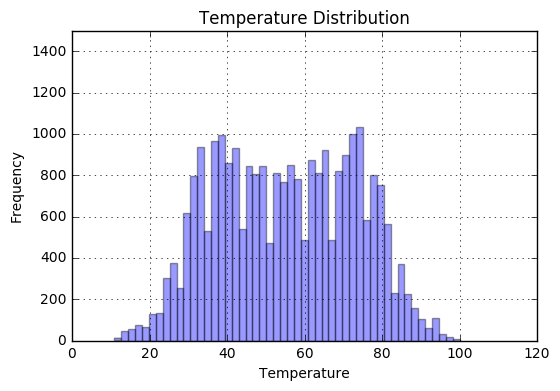

In [29]:
plt.hist(temp,50,color="b",alpha=0.4)
plt.axis([0, 120, 0, 1500])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.grid(True)

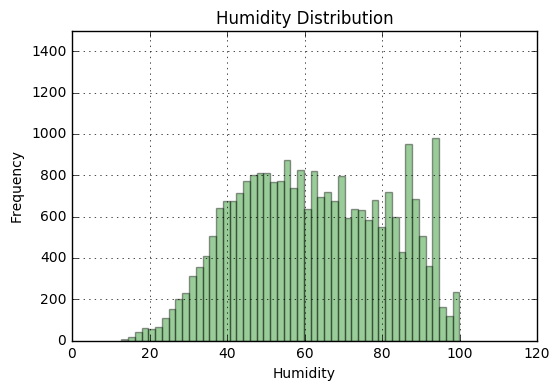

In [30]:
plt.hist(humidity,50,color="g",alpha=0.4)
plt.axis([0, 120, 0, 1500])
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.title("Humidity Distribution")
plt.grid(True)

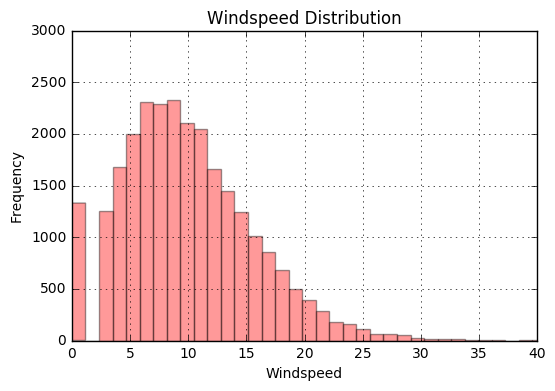

In [31]:
plt.hist(windspeed,900,color="r",alpha=0.4)
plt.axis([0, 40, 0, 3000])
plt.xlabel("Windspeed")
plt.ylabel("Frequency")
plt.title("Windspeed Distribution")
plt.grid(True)

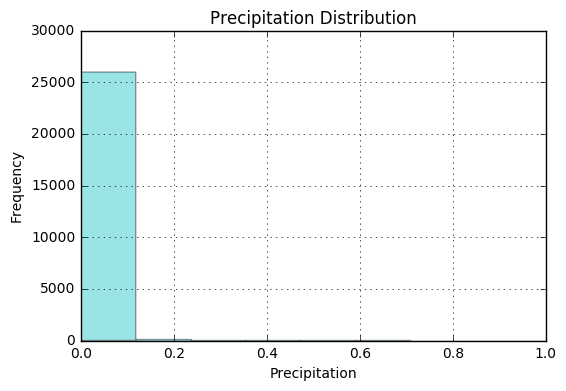

In [32]:
plt.hist(precipitation,10,color="c",alpha=0.4)
plt.axis([0, 1, 0, 30000])
plt.xlabel("Precipitation")
plt.ylabel("Frequency")
plt.title("Precipitation Distribution")
plt.grid(True)

# save data from mydelay into a csv file

In [33]:
import csv
cursor.execute('''
                SELECT *
                FROM mydelay
               ''')
x=cursor.fetchall()

with open('mydelay.csv','w',newline='') as f:
    writecsv=csv.writer(f, delimiter=",")
    header=["number","year","month","day","dep_time","sched_dep_time",
            "dep_delay","arr_time","sched_arr_time","arr_delay",
            "carrier","flight","tailnum","origin","dest","air_time",
            "distance","hour","minute","time_hour"]
    writecsv.writerow(header)
    for row in x:
        writecsv.writerow(row)
    print (header)

['number', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']


In [34]:
cursor.close()
con.close()